In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pycbc
from pycbc import waveform

In [2]:
# Run this to get a list of approximant models that you can use to create waveforms
waveform.td_approximants()

['TaylorT1',
 'TaylorT2',
 'TaylorT3',
 'SpinTaylorT1',
 'SpinTaylorT4',
 'SpinTaylorT5',
 'PhenSpinTaylor',
 'PhenSpinTaylorRD',
 'EOBNRv2',
 'EOBNRv2HM',
 'TEOBResum_ROM',
 'SEOBNRv1',
 'SEOBNRv2',
 'SEOBNRv2_opt',
 'SEOBNRv3',
 'SEOBNRv3_pert',
 'SEOBNRv3_opt',
 'SEOBNRv3_opt_rk4',
 'SEOBNRv4',
 'SEOBNRv4_opt',
 'SEOBNRv4P',
 'SEOBNRv4PHM',
 'SEOBNRv2T',
 'SEOBNRv4T',
 'SEOBNRv4_ROM_NRTidalv2',
 'SEOBNRv4_ROM_NRTidalv2_NSBH',
 'HGimri',
 'IMRPhenomA',
 'IMRPhenomB',
 'IMRPhenomC',
 'IMRPhenomD',
 'IMRPhenomD_NRTidalv2',
 'IMRPhenomNSBH',
 'IMRPhenomHM',
 'IMRPhenomPv2',
 'IMRPhenomPv2_NRTidal',
 'IMRPhenomPv2_NRTidalv2',
 'TaylorEt',
 'TaylorT4',
 'EccentricTD',
 'SpinDominatedWf',
 'NR_hdf5',
 'NRSur7dq2',
 'NRSur7dq4',
 'SEOBNRv4HM',
 'NRHybSur3dq8',
 'IMRPhenomXAS',
 'IMRPhenomXHM',
 'IMRPhenomPv3',
 'IMRPhenomPv3HM',
 'IMRPhenomXP',
 'IMRPhenomXPHM',
 'TEOBResumS',
 'IMRPhenomT',
 'IMRPhenomTHM',
 'IMRPhenomTP',
 'IMRPhenomTPHM',
 'TaylorF2',
 'SEOBNRv1_ROM_EffectiveSpin',
 'SEO

In [3]:
dt = 1e-3

### Let's see whether different approximant models give similar waveforms

In [4]:
hp1, hc1 = waveform.get_td_waveform(approximant='SEOBNRv2',
                          mass1=20,
                          mass2=20,
                          delta_t=dt,
                          f_lower=40
                          )

hp2, hc2 = waveform.get_td_waveform(approximant='EOBNRv2',
                           mass1=20,
                           mass2=20,
                           delta_t=dt,
                           f_lower=40
                          )


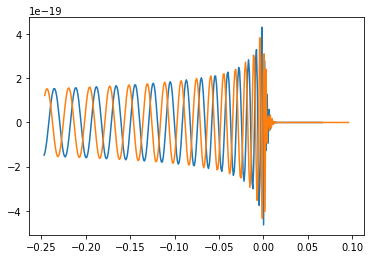

In [5]:
plt.plot(hp1.sample_times, hp1)
plt.plot(hp2.sample_times, hp2)

In [6]:
amp1 = waveform.utils.amplitude_from_polarizations(hp1, hc1)
amp2 = waveform.utils.amplitude_from_polarizations(hp2, hc2)

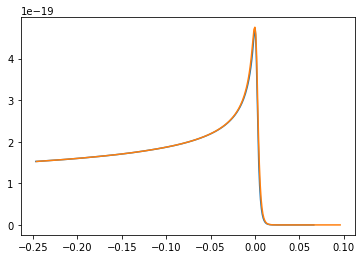

In [7]:
plt.plot(hp1.sample_times, amp1)
plt.plot(hp2.sample_times, amp2)

In [8]:
phase1 = waveform.utils.phase_from_polarizations(hp1, hc1)
phase2 = waveform.utils.phase_from_polarizations(hp2, hc2)

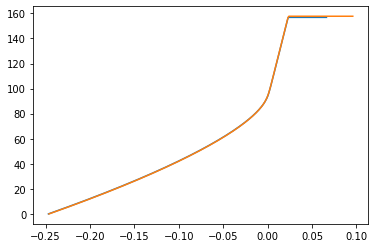

In [9]:
plt.plot(hp1.sample_times, phase1)
plt.plot(hp2.sample_times, phase2)

### The polarzations timeseries don't exactly align but the amplitude and phase timeseries do, which is what we care about. This is good.

### Let's see whether the SEOBNRv2 model only depends on mass ratio

In [10]:
hp20, hc20 = waveform.get_td_waveform(approximant='SEOBNRv2',
                          mass1=20,
                          mass2=20,
                          delta_t=dt,
                          f_lower=30
                          )

hp30, hc30 = waveform.get_td_waveform(approximant='SEOBNRv2',
                           mass1=30,
                           mass2=30,
                           delta_t=dt,
                           f_lower=30
                          )

hp40, hc40 = waveform.get_td_waveform(approximant='SEOBNRv2',
                           mass1=40,
                           mass2=40,
                           delta_t=dt,
                           f_lower=30
                          )

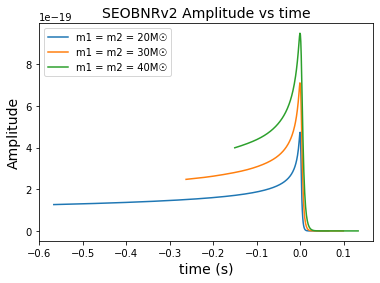

In [11]:
plt.title("SEOBNRv2 Amplitude vs time", fontsize=14)

amp20 = waveform.utils.amplitude_from_polarizations(hp20, hc20)
amp30 = waveform.utils.amplitude_from_polarizations(hp30, hc30)
amp40 = waveform.utils.amplitude_from_polarizations(hp40, hc40)
plt.plot(amp20.sample_times, amp20, label = "m1 = m2 = 20M☉")
plt.plot(amp30.sample_times, amp30, label = "m1 = m2 = 30M☉")
plt.plot(amp40.sample_times, amp40, label = "m1 = m2 = 40M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)

plt.legend()

In [12]:
def normalize_phase(phase_series):
    return phase_series - phase_series.at_time(0)

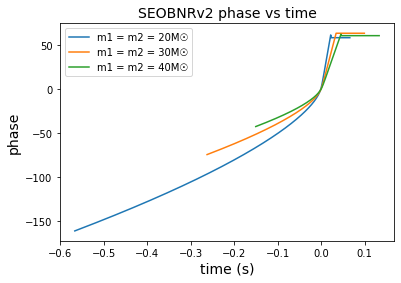

In [13]:
plt.title("SEOBNRv2 phase vs time", fontsize=14)

phase20 = normalize_phase(waveform.utils.phase_from_polarizations(hp20, hc20))
phase30 = normalize_phase(waveform.utils.phase_from_polarizations(hp30, hc30))
phase40 = normalize_phase(waveform.utils.phase_from_polarizations(hp40, hc40))

plt.plot(phase20.sample_times, phase20, label = "m1 = m2 = 20M☉")
plt.plot(phase30.sample_times, phase30, label = "m1 = m2 = 30M☉")
plt.plot(phase40.sample_times, phase40, label = "m1 = m2 = 40M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("phase", fontsize=14)

plt.legend()

### Huh, this is concerning. Amplitude seems to not be well-defined by mass ratio alone, and seems to depend on the mass of the bodies. Let's check the high-mass regime.

In [14]:
hp50, hc50 = waveform.get_td_waveform(approximant='SEOBNRv2',
                          mass1=50,
                          mass2=50,
                          delta_t=dt,
                          f_lower=20
                          )

hp75, hc75 = waveform.get_td_waveform(approximant='SEOBNRv2',
                           mass1=75,
                           mass2=75,
                           delta_t=dt,
                           f_lower=20
                          )

hp100, hc100 = waveform.get_td_waveform(approximant='SEOBNRv2',
                           mass1=100,
                           mass2=100,
                           delta_t=dt,
                           f_lower=20
                          )

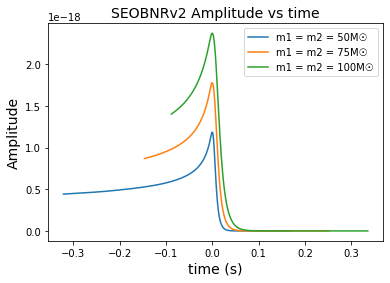

In [15]:
plt.title("SEOBNRv2 Amplitude vs time", fontsize=14)

amp50 = waveform.utils.amplitude_from_polarizations(hp50, hc50)
amp75 = waveform.utils.amplitude_from_polarizations(hp75, hc75)
amp100 = waveform.utils.amplitude_from_polarizations(hp100, hc100)
plt.plot(amp50.sample_times, amp50, label = "m1 = m2 = 50M☉")
plt.plot(amp75.sample_times, amp75, label = "m1 = m2 = 75M☉")
plt.plot(amp100.sample_times, amp100, label = "m1 = m2 = 100M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)

plt.legend()

### I hear good things about the PhenomD model: https://arxiv.org/abs/1601.05396 . Let's try it.

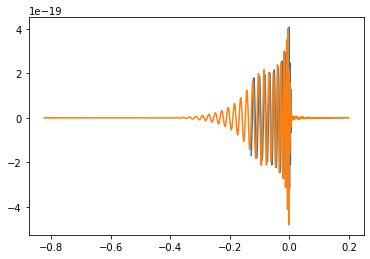

In [16]:
hp1, hc1 = waveform.get_td_waveform(approximant='SEOBNRv2',
                          mass1=20,
                          mass2=20,
                          delta_t=dt,
                          f_lower=50
                          )

hp2, hc2 = waveform.get_td_waveform(approximant='IMRPhenomD',
                           mass1=20,
                           mass2=20,
                           delta_t=dt,
                           f_lower=50
                          )

plt.plot(hp1.sample_times, hp1)
plt.plot(hp2.sample_times, hp2)

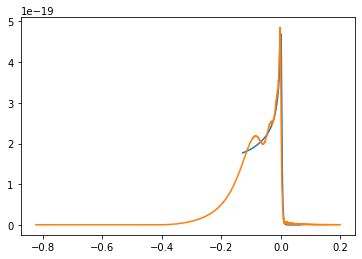

In [17]:
amp1 = waveform.utils.amplitude_from_polarizations(hp1, hc1)
amp2 = waveform.utils.amplitude_from_polarizations(hp2, hc2)

plt.plot(hp1.sample_times, amp1)
plt.plot(hp2.sample_times, amp2)

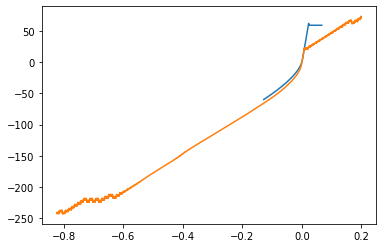

In [18]:
phase1 = normalize_phase(waveform.utils.phase_from_polarizations(hp1, hc1))
phase2 = normalize_phase(waveform.utils.phase_from_polarizations(hp2, hc2))

plt.plot(hp1.sample_times, phase1)
plt.plot(hp2.sample_times, phase2)

In [19]:
hp20, hc20 = waveform.get_td_waveform(approximant='IMRPhenomD',
                          mass1=20,
                          mass2=20,
                          delta_t=dt,
                          f_lower=30
                          )

hp30, hc30 = waveform.get_td_waveform(approximant='IMRPhenomD',
                           mass1=30,
                           mass2=30,
                           delta_t=dt,
                           f_lower=30
                          )

hp40, hc40 = waveform.get_td_waveform(approximant='IMRPhenomD',
                           mass1=40,
                           mass2=40,
                           delta_t=dt,
                           f_lower=30
                          )

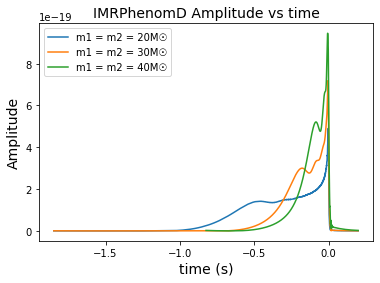

In [20]:
plt.title("IMRPhenomD Amplitude vs time", fontsize=14)

amp20 = waveform.utils.amplitude_from_polarizations(hp20, hc20)
amp30 = waveform.utils.amplitude_from_polarizations(hp30, hc30)
amp40 = waveform.utils.amplitude_from_polarizations(hp40, hc40)
plt.plot(amp20.sample_times, amp20, label = "m1 = m2 = 20M☉")
plt.plot(amp30.sample_times, amp30, label = "m1 = m2 = 30M☉")
plt.plot(amp40.sample_times, amp40, label = "m1 = m2 = 40M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)

plt.legend()

In [21]:
hp50, hc50 = waveform.get_td_waveform(approximant='IMRPhenomD',
                          mass1=50,
                          mass2=50,
                          delta_t=dt,
                          f_lower=20
                          )

hp75, hc75 = waveform.get_td_waveform(approximant='IMRPhenomD',
                           mass1=75,
                           mass2=75,
                           delta_t=dt,
                           f_lower=20
                          )

hp100, hc100 = waveform.get_td_waveform(approximant='IMRPhenomD',
                           mass1=100,
                           mass2=100,
                           delta_t=dt,
                           f_lower=20
                          )

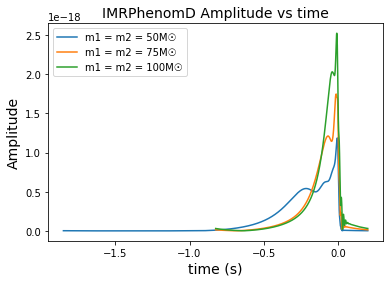

In [22]:
plt.title("IMRPhenomD Amplitude vs time", fontsize=14)

amp50 = waveform.utils.amplitude_from_polarizations(hp50, hc50)
amp75 = waveform.utils.amplitude_from_polarizations(hp75, hc75)
amp100 = waveform.utils.amplitude_from_polarizations(hp100, hc100)
plt.plot(amp50.sample_times, amp50, label = "m1 = m2 = 50M☉")
plt.plot(amp75.sample_times, amp75, label = "m1 = m2 = 75M☉")
plt.plot(amp100.sample_times, amp100, label = "m1 = m2 = 100M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)

plt.legend()

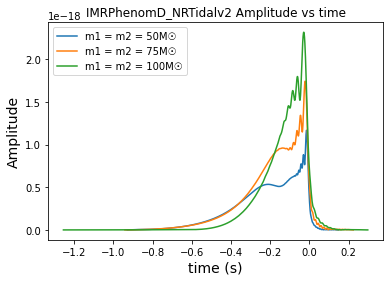

In [23]:
hp50, hc50 = waveform.get_td_waveform(approximant='IMRPhenomD_NRTidalv2',
                          mass1=50,
                          mass2=50,
                          delta_t=dt,
                          f_lower=20
                          )

hp75, hc75 = waveform.get_td_waveform(approximant='IMRPhenomD_NRTidalv2',
                           mass1=75,
                           mass2=75,
                           delta_t=dt,
                           f_lower=20
                          )

hp100, hc100 = waveform.get_td_waveform(approximant='IMRPhenomD_NRTidalv2',
                           mass1=100,
                           mass2=100,
                           delta_t=dt,
                           f_lower=20
                          )

plt.title("IMRPhenomD_NRTidalv2 Amplitude vs time", fontsize=12)

amp50 = waveform.utils.amplitude_from_polarizations(hp50, hc50)
amp75 = waveform.utils.amplitude_from_polarizations(hp75, hc75)
amp100 = waveform.utils.amplitude_from_polarizations(hp100, hc100)
plt.plot(amp50.sample_times, amp50, label = "m1 = m2 = 50M☉")
plt.plot(amp75.sample_times, amp75, label = "m1 = m2 = 75M☉")
plt.plot(amp100.sample_times, amp100, label = "m1 = m2 = 100M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)

plt.legend()

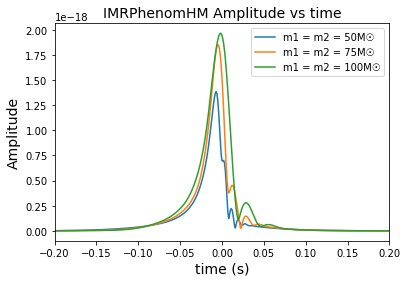

In [24]:
hp50, hc50 = waveform.get_td_waveform(approximant='IMRPhenomHM',
                          mass1=50,
                          mass2=50,
                          delta_t=dt,
                          f_lower=60
                          )

hp75, hc75 = waveform.get_td_waveform(approximant='IMRPhenomHM',
                           mass1=75,
                           mass2=75,
                           delta_t=dt,
                           f_lower=60
                          )

hp100, hc100 = waveform.get_td_waveform(approximant='IMRPhenomHM',
                           mass1=100,
                           mass2=100,
                           delta_t=dt,
                           f_lower=60
                          )

plt.title("IMRPhenomHM Amplitude vs time", fontsize=14)

amp50 = waveform.utils.amplitude_from_polarizations(hp50, hc50)
amp75 = waveform.utils.amplitude_from_polarizations(hp75, hc75)
amp100 = waveform.utils.amplitude_from_polarizations(hp100, hc100)
plt.plot(amp50.sample_times, amp50, label = "m1 = m2 = 50M☉")
plt.plot(amp75.sample_times, amp75, label = "m1 = m2 = 75M☉")
plt.plot(amp100.sample_times, amp100, label = "m1 = m2 = 100M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.xlim(-0.2, 0.2)

plt.legend()

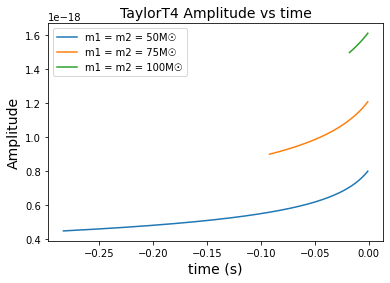

In [25]:
hp50, hc50 = waveform.get_td_waveform(approximant='TaylorT4',
                          mass1=50,
                          mass2=50,
                          delta_t=dt,
                          f_lower=20
                          )

hp75, hc75 = waveform.get_td_waveform(approximant='TaylorT4',
                           mass1=75,
                           mass2=75,
                           delta_t=dt,
                           f_lower=20
                          )

hp100, hc100 = waveform.get_td_waveform(approximant='TaylorT4',
                           mass1=100,
                           mass2=100,
                           delta_t=dt,
                           f_lower=20
                          )

plt.title("TaylorT4 Amplitude vs time", fontsize=14)

amp50 = waveform.utils.amplitude_from_polarizations(hp50, hc50)
amp75 = waveform.utils.amplitude_from_polarizations(hp75, hc75)
amp100 = waveform.utils.amplitude_from_polarizations(hp100, hc100)
plt.plot(amp50.sample_times, amp50, label = "m1 = m2 = 50M☉")
plt.plot(amp75.sample_times, amp75, label = "m1 = m2 = 75M☉")
plt.plot(amp100.sample_times, amp100, label = "m1 = m2 = 100M☉")
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
# plt.xlim(-0.2, 0.2)

plt.legend()

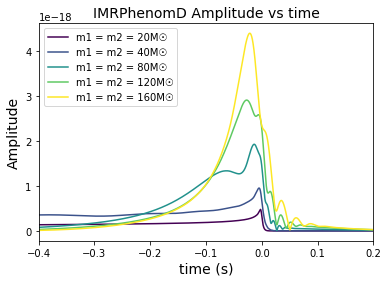

In [26]:
dt = 1e-5
polarizations = []
for m in [20, 40, 80, 120, 160]:
    hp, hc = waveform.get_td_waveform(approximant='IMRPhenomD',
                          mass1=m,
                          mass2=m,
                          delta_t=dt,
                          f_lower=20
                          )
    polarizations.append((hp, hc))
    
plt.title("IMRPhenomD Amplitude vs time", fontsize=14)

colors = plt.cm.viridis(np.linspace(0, 1, 5))
for i, m in enumerate([20, 40, 80, 120, 160]):
    hp, hc = polarizations[i]
    amp = waveform.utils.amplitude_from_polarizations(hp, hc)
    plt.plot(amp.sample_times, amp, label = f"m1 = m2 = {m}M☉", color=colors[i])
    

plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.xlim(-0.4, 0.2)

plt.legend()

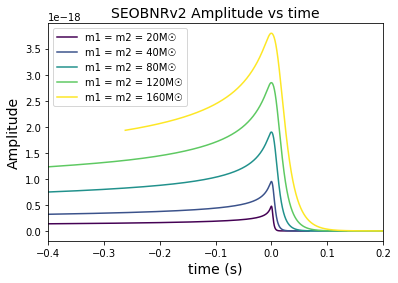

In [27]:
dt = 1e-5
polarizations = []
for m in [20, 40, 80, 120, 160]:
    hp, hc = waveform.get_td_waveform(approximant='SEOBNRv2',
                          mass1=m,
                          mass2=m,
                          delta_t=dt,
                          f_lower=10
                          )
    polarizations.append((hp, hc))
    
plt.title("SEOBNRv2 Amplitude vs time", fontsize=14)

colors = plt.cm.viridis(np.linspace(0, 1, 5))
for i, m in enumerate([20, 40, 80, 120, 160]):
    hp, hc = polarizations[i]
    amp = waveform.utils.amplitude_from_polarizations(hp, hc)
    plt.plot(amp.sample_times, amp, label = f"m1 = m2 = {m}M☉", color=colors[i])


plt.xlabel("time (s)", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.xlim(-0.4, 0.2)

plt.legend()